# Sales Predictive Modeling: Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import pandas.api.types as ptype
import matplotlib.pyplot as plt
import seaborn as sns

## Approach for EDA: 

**Exploratory Data Analysis (EDA):**
   - **Visualize Data:** Use plots to understand relationships between features and the target variable.
   - **Correlation Analysis:** Identify how features are correlated with sales and with each other.
   - **Feature Importance:** Determine which features are most influential in predicting sales.

In [3]:
# load dataset for exploratory data analysis
bigmart = pd.read_csv("bigmart_eda_dataset.csv", index_col=0)
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Age,Visibility_p_MRP,Item_Identifier_Categories,Item_Type_Enc
0,FDA15,-0.841872,Low Fat,-0.970732,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.000064,FD,4
1,DRC01,-1.641706,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.000399,DR,14
2,FDN15,1.098554,Low Fat,-0.956917,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.000118,FD,10
3,FDX07,1.500838,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,1998,Unknown size,Tier 3,Grocery Store,732.3800,26,0.000000,FD,6
4,NCD19,-0.929428,Low Fat,-1.281758,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,NC,9


## Data Transformation

In [4]:
# load original dataset
df = pd.read_csv("bigmart_sales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# tranform data: 
def transform_data(orig_data, data, features):
  item_feature_data = orig_data[features]
  data = data.drop(columns=item_feature_data)
  data = pd.concat([data, item_feature_data], axis=1)
  return data

# call the transform data function --> modify the eda dataset
bigmart = transform_data(df, bigmart, ["Item_Weight", "Item_Visibility", "Item_MRP"])

In [6]:
bigmart.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Age,Visibility_p_MRP,Item_Identifier_Categories,Item_Type_Enc,Item_Weight,Item_Visibility,Item_MRP
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.000064,FD,4,9.30,0.016047,249.8092
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.000399,DR,14,5.92,0.019278,48.2692
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.000118,FD,10,17.50,0.016760,141.6180
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Unknown size,Tier 3,Grocery Store,732.3800,26,0.000000,FD,6,19.20,0.000000,182.0950
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,NC,9,8.93,0.000000,53.8614


## Visualising Relationship between features and target variable

- **Item features**: Item Identifier, Item Weight, Item Fat Content, Item Visibility, Item Type, Item MRP (price).
- **Store features**: Outlet Identifier, Outlet Size, Outlet Location Type, Outlet Type (supermarket or grocery store), Outlet Establishment Year.
- **Target**: Item Outlet Sales (the total sales of each product in each store).


In order to build a relationship between the features of items and stores with the item outlet sales, we will divide the dataset into 2 main categories. One dataset contains all related features about the item while the other dataset have all details about the store. To implement this division, we create 2 lists for each categories that stores the details of item and store. 

In [7]:
# extract features for item and store
item_features = []
store_features = []

for category in bigmart.columns: 
  if "Item" in category: 
    item_features.append(category)
  elif "Outlet" in category: 
    store_features.append(category)

print(f"Item features: {item_features}")
print(f"Store features: {store_features}")

Item features: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_Outlet_Sales', 'Item_Age', 'Item_Identifier_Categories', 'Item_Type_Enc', 'Item_Weight', 'Item_Visibility', 'Item_MRP']
Store features: ['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [8]:
# divide bigmart sales dataset into item and store dataset
item_df = bigmart[item_features]
store_df = bigmart[store_features]

In [9]:
item_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_Outlet_Sales,Item_Age,Item_Identifier_Categories,Item_Type_Enc,Item_Weight,Item_Visibility,Item_MRP
0,FDA15,Low Fat,Dairy,3735.1380,25,FD,4,9.30,0.016047,249.8092
1,DRC01,Regular,Soft Drinks,443.4228,15,DR,14,5.92,0.019278,48.2692
2,FDN15,Low Fat,Meat,2097.2700,25,FD,10,17.50,0.016760,141.6180
3,FDX07,Regular,Fruits and Vegetables,732.3800,26,FD,6,19.20,0.000000,182.0950
4,NCD19,Low Fat,Household,994.7052,37,NC,9,8.93,0.000000,53.8614


In [10]:
store_df.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,OUT010,1998,Unknown size,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1


For building a sales predictive model to efficiently learn from sales data stored in BigMart database, it is important to discover relationships and patterns of features through visualisations. After the division, we will create a scatterplot to check the feature item weight, item visibility, item mrp and item age to correlate them to item outlet sales. 

In [11]:
# create relationship plot 
item_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_Outlet_Sales,Item_Age,Item_Identifier_Categories,Item_Type_Enc,Item_Weight,Item_Visibility,Item_MRP
0,FDA15,Low Fat,Dairy,3735.1380,25,FD,4,9.30,0.016047,249.8092
1,DRC01,Regular,Soft Drinks,443.4228,15,DR,14,5.92,0.019278,48.2692
2,FDN15,Low Fat,Meat,2097.2700,25,FD,10,17.50,0.016760,141.6180
3,FDX07,Regular,Fruits and Vegetables,732.3800,26,FD,6,19.20,0.000000,182.0950
4,NCD19,Low Fat,Household,994.7052,37,NC,9,8.93,0.000000,53.8614


In [12]:
item_num_prop = item_df[ ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Age", "Item_Type_Enc"]]
item_sales = item_df[["Item_Outlet_Sales"]]
item_rel_data = pd.concat([item_num_prop, item_sales], axis=1)
item_rel_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Age,Item_Type_Enc,Item_Outlet_Sales
0,9.30,0.016047,249.8092,25,4,3735.1380
1,5.92,0.019278,48.2692,15,14,443.4228
2,17.50,0.016760,141.6180,25,10,2097.2700
3,19.20,0.000000,182.0950,26,6,732.3800
4,8.93,0.000000,53.8614,37,9,994.7052


In [13]:
# create a correlation analysis
def correlation_analysis(num_data,coordinates): 
  # create a correlation analysis
  corr_data = num_data.corr()

  # build a correlantion map
  plt.figure(figsize=coordinates, dpi=80)
  sns.heatmap(corr_data, annot=True)
  plt.title("Correlation Map")
  plt.show()

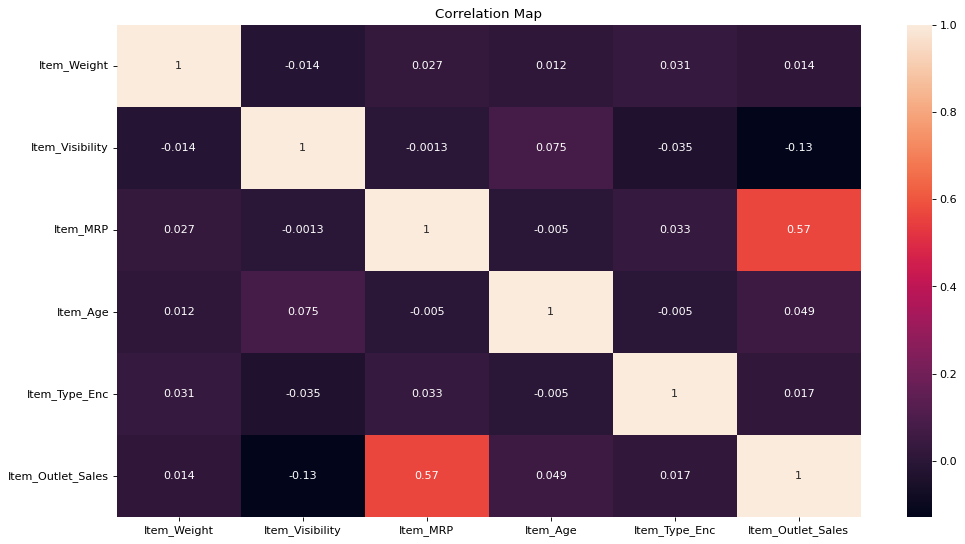

In [14]:
correlation_analysis(item_rel_data, (15,8))

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

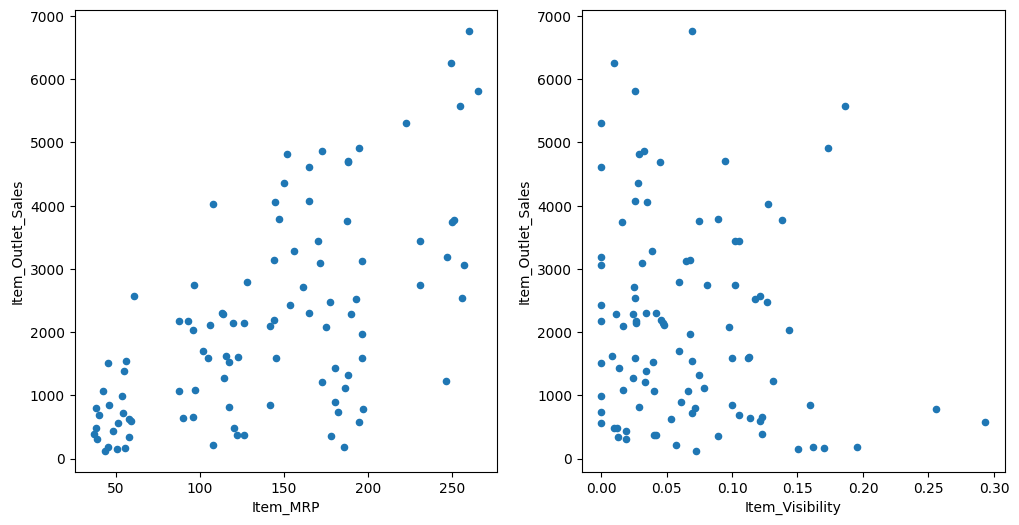

In [15]:
fig, regplot = plt.subplots(1,2, figsize=(12,6))

# scatterplot: item mrp and item visibility vs item outlet sales
item_rel_data.iloc[:100].plot.scatter("Item_MRP", "Item_Outlet_Sales", ax=regplot[0])
item_rel_data.iloc[:100].plot.scatter("Item_Visibility", "Item_Outlet_Sales", ax=regplot[1])
